In [1055]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [1056]:
df = pd.read_csv('flight_delays.csv')
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [1057]:
def trunc_str_int(s):
    return int(s[2::])


def bool_int(S):
    return 1 if S == 'Y' else 0


df = df.rename(columns={"dep_delayed_15min": "Delayed"})
df['Delayed'] = df['Delayed'].apply(bool_int)
df['DayofMonth'] = df['DayofMonth'].apply(trunc_str_int)
df['DayOfWeek'] = df['DayOfWeek'].apply(trunc_str_int)
df['Month'] = df['Month'].apply(trunc_str_int)
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Delayed
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


### 1. Доля всех задержек ко всем вылетам

In [1058]:
print('Доля задержек: ', df['Delayed'].sum() / len(df))

Доля задержек:  0.19044


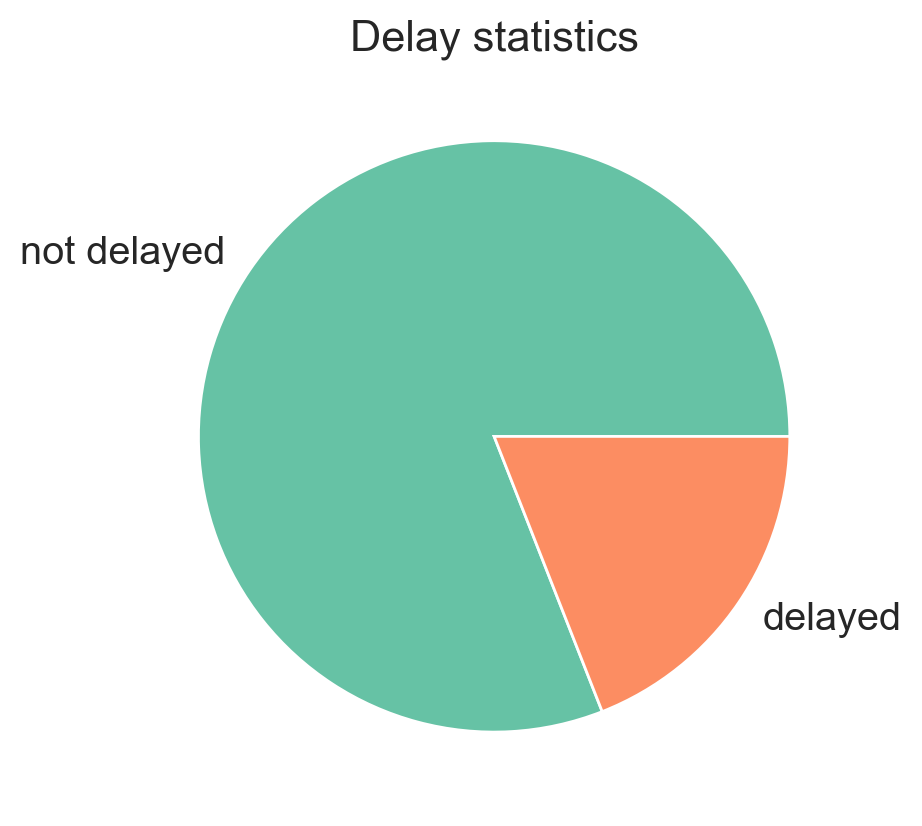

In [1059]:
plt.pie(df.groupby('Delayed')['Delayed'].count(), labels=['not delayed', 'delayed'])
plt.title("Delay statistics")
plt.show()

### 2. Найти зависимость количества задержек от длины пути, который предстоит пролететь самолету

In [1060]:
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Delayed
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
5,8,3,4,1918,NW,MEM,MCO,683,0
6,1,27,4,754,DL,PBI,LGA,1035,0
7,4,29,6,635,OH,MSP,CVG,596,0
8,7,28,5,735,AA,ONT,DFW,1189,0
9,6,20,2,2029,OO,DEN,PSC,853,0


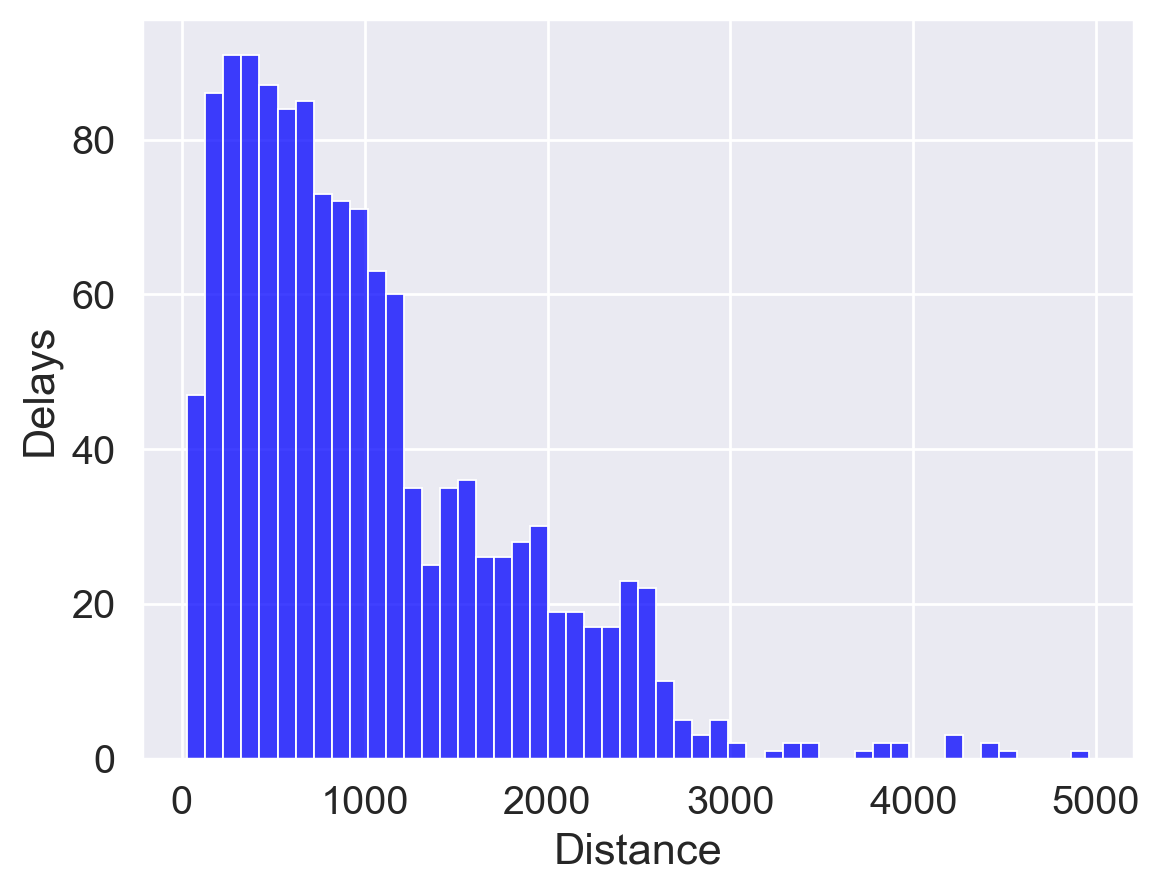

In [1061]:
A = df.groupby('Distance')['Delayed'].sum().reset_index()
sns.histplot(data=A, x='Distance', bins=50, color='blue')
plt.ylabel('Delays')
plt.show()

Видим, что с увеличением дальности полёта количество задержек рейсов уменьшается.

### 3. Топ 5 направлений, для которых чаще всего происходят задержки

In [1062]:
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Delayed
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
5,8,3,4,1918,NW,MEM,MCO,683,0
6,1,27,4,754,DL,PBI,LGA,1035,0
7,4,29,6,635,OH,MSP,CVG,596,0
8,7,28,5,735,AA,ONT,DFW,1189,0
9,6,20,2,2029,OO,DEN,PSC,853,0


In [1063]:
B = df.groupby('Dest')['Delayed'].sum().reset_index()
B = B.sort_values(by='Delayed', ascending=False)
B.head(5).style.hide()

Dest,Delayed
ATL,1281
ORD,1072
DFW,656
EWR,584
LAX,525


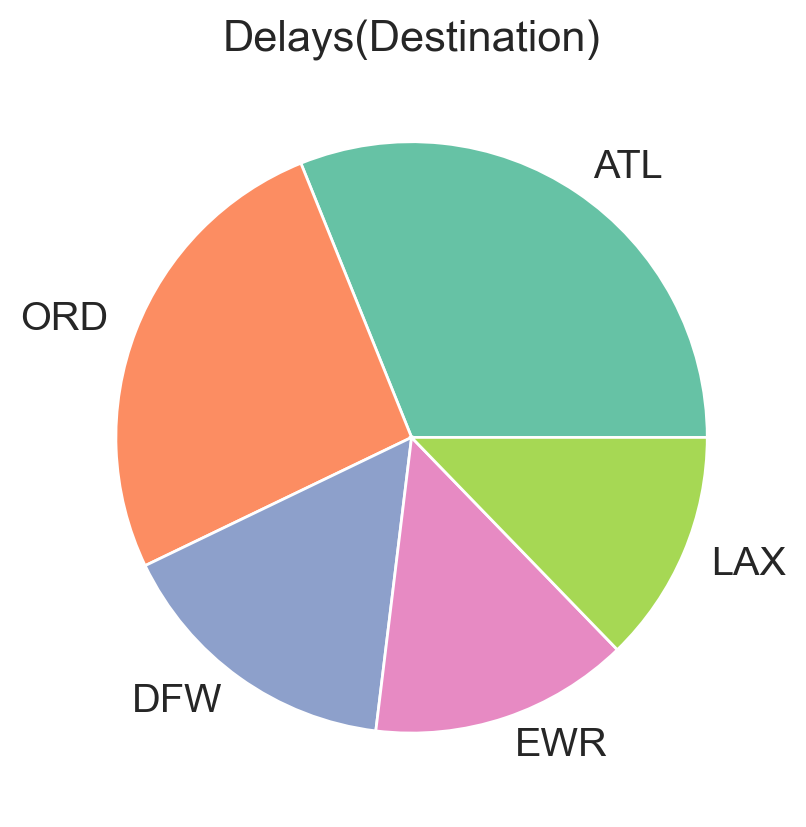

In [1064]:
plt.pie(B.head(5)['Delayed'], labels=B.head(5)['Dest'])
plt.title("Delays(Destination)")
plt.show()

### 4. В какие времена года чаще всего происходят задержки рейсов

In [1065]:
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Delayed
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
5,8,3,4,1918,NW,MEM,MCO,683,0
6,1,27,4,754,DL,PBI,LGA,1035,0
7,4,29,6,635,OH,MSP,CVG,596,0
8,7,28,5,735,AA,ONT,DFW,1189,0
9,6,20,2,2029,OO,DEN,PSC,853,0


In [1066]:
def season(q):
    if q == 1 or q == 2 or q == 12:
        return 'winter'
    if 3 <= q <= 5:
        return 'spring'
    if 6 <= q <= 8:
        return 'summer'
    if 9 <= q <= 11:
        return 'autumn'
    

df['Season'] = df['Month'].apply(season)
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Delayed,Season
0,8,21,7,1934,AA,ATL,DFW,732,0,summer
1,4,20,3,1548,US,PIT,MCO,834,0,spring
2,9,2,5,1422,XE,RDU,CLE,416,0,autumn
3,11,25,6,1015,OO,DEN,MEM,872,0,autumn
4,10,7,6,1828,WN,MDW,OMA,423,1,autumn
...,...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0,spring
99996,1,18,3,804,CO,EWR,DAB,884,0,winter
99997,1,24,2,1901,NW,DTW,IAH,1076,0,winter
99998,4,27,4,1515,MQ,DFW,GGG,140,0,spring


In [1067]:
C = df.groupby('Season')['Delayed'].sum().reset_index()
C = C.sort_values(by='Delayed', ascending=False)
C.style.hide()

Season,Delayed
summer,5723
winter,4849
spring,4295
autumn,4177


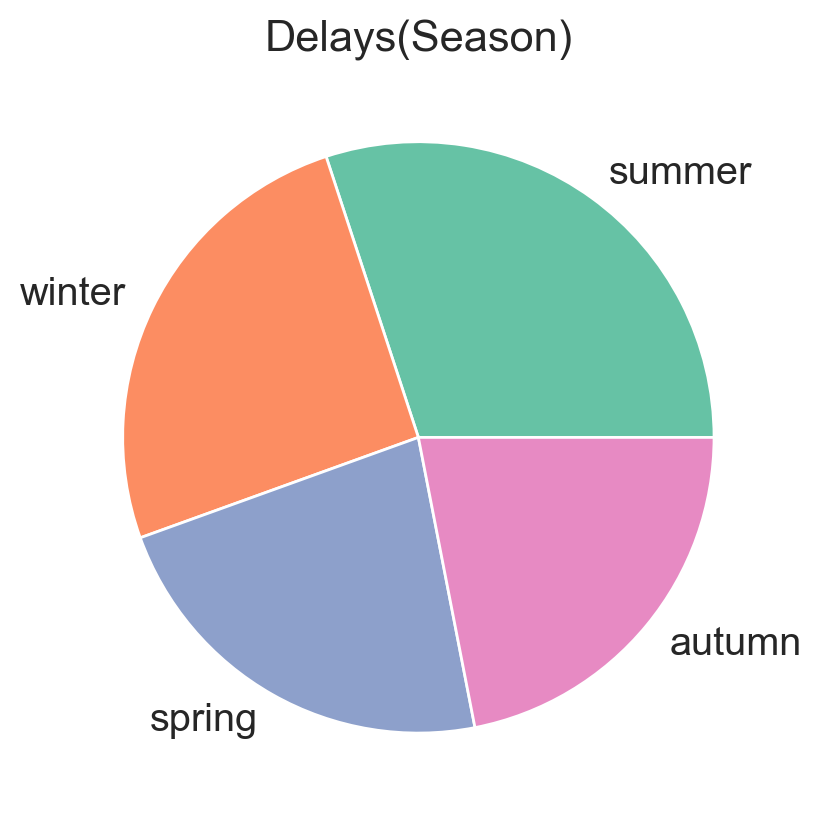

In [1068]:
plt.pie(data=C, x='Delayed', labels='Season')
plt.title("Delays(Season)")
plt.show()

### 5. Найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [1069]:
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Delayed,Season
0,8,21,7,1934,AA,ATL,DFW,732,0,summer
1,4,20,3,1548,US,PIT,MCO,834,0,spring
2,9,2,5,1422,XE,RDU,CLE,416,0,autumn
3,11,25,6,1015,OO,DEN,MEM,872,0,autumn
4,10,7,6,1828,WN,MDW,OMA,423,1,autumn
5,8,3,4,1918,NW,MEM,MCO,683,0,summer
6,1,27,4,754,DL,PBI,LGA,1035,0,winter
7,4,29,6,635,OH,MSP,CVG,596,0,spring
8,7,28,5,735,AA,ONT,DFW,1189,0,summer
9,6,20,2,2029,OO,DEN,PSC,853,0,summer


In [1070]:
D = df.groupby('UniqueCarrier')['Delayed'].sum().reset_index()
D = D.sort_values(by='Delayed', ascending=False)
D.head(10).style.hide()

UniqueCarrier,Delayed
WN,3219
AA,1770
MQ,1448
DL,1373
UA,1322
OO,1277
US,1085
EV,1082
NW,1075
XE,1026


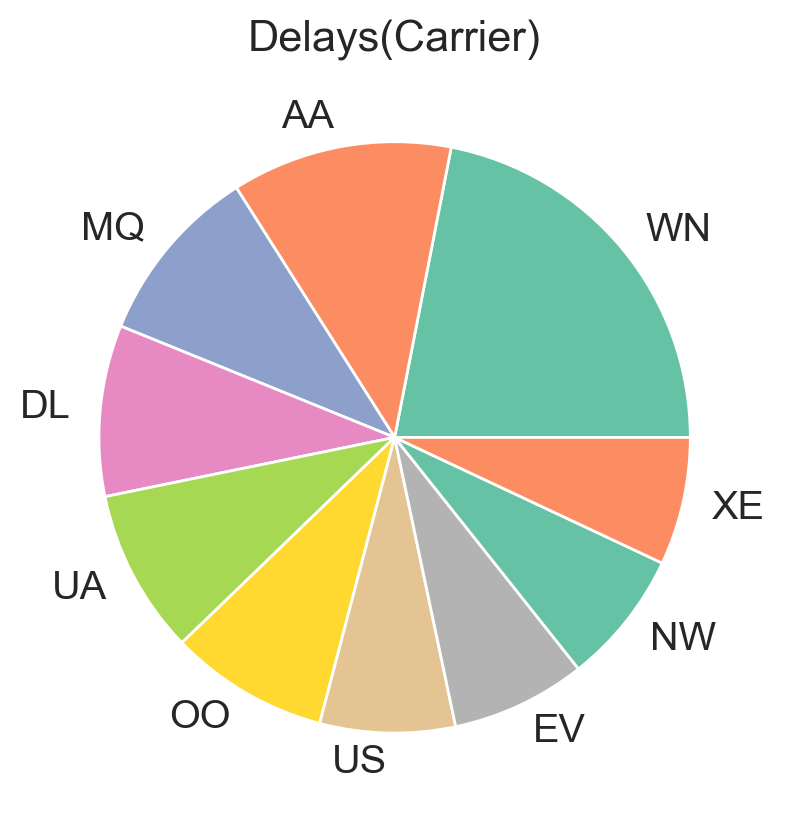

In [1071]:
plt.pie(data=D.head(10), x='Delayed', labels='UniqueCarrier')
plt.title("Delays(Carrier)")
plt.show()

### 6. Найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [1072]:
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Delayed,Season
0,8,21,7,1934,AA,ATL,DFW,732,0,summer
1,4,20,3,1548,US,PIT,MCO,834,0,spring
2,9,2,5,1422,XE,RDU,CLE,416,0,autumn
3,11,25,6,1015,OO,DEN,MEM,872,0,autumn
4,10,7,6,1828,WN,MDW,OMA,423,1,autumn
5,8,3,4,1918,NW,MEM,MCO,683,0,summer
6,1,27,4,754,DL,PBI,LGA,1035,0,winter
7,4,29,6,635,OH,MSP,CVG,596,0,spring
8,7,28,5,735,AA,ONT,DFW,1189,0,summer
9,6,20,2,2029,OO,DEN,PSC,853,0,summer


In [1073]:
E = df.groupby('Origin')['Delayed'].sum().reset_index()
E = E.sort_values(by='Delayed', ascending=False)
E.head(10).style.hide()

Origin,Delayed
ATL,1506
ORD,1254
DFW,902
DEN,575
LAX,552
LAS,546
EWR,538
IAH,492
PHX,491
DTW,401


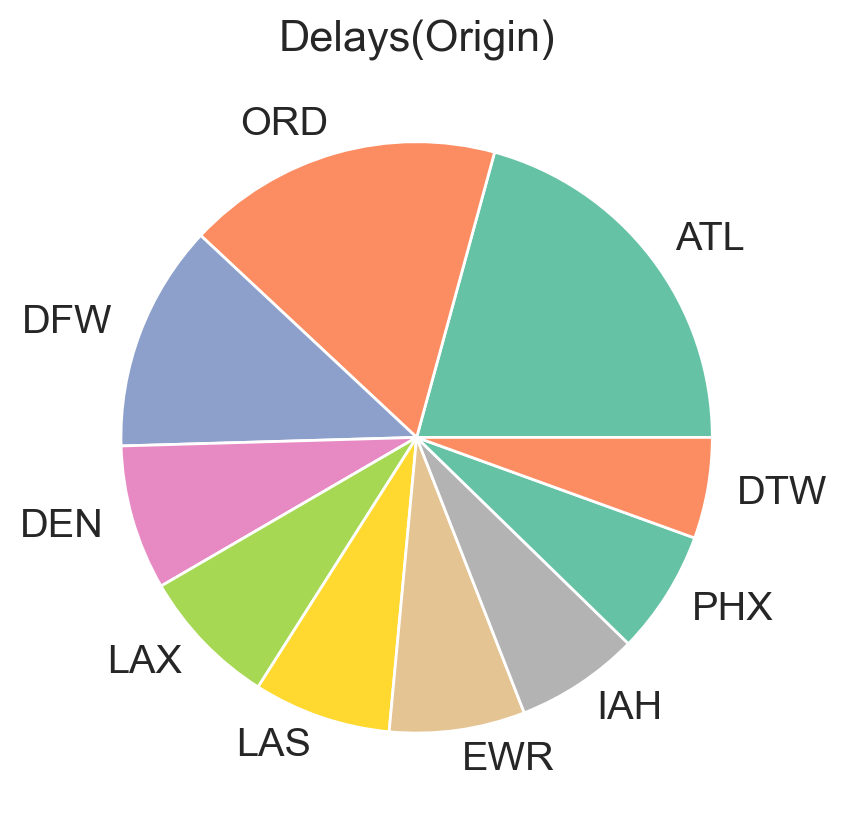

In [1074]:
plt.pie(data=E.head(10), x='Delayed', labels='Origin')
plt.title("Delays(Origin)")
plt.show()

### 7. Найти необычную зависимость количества задержек от имеющихся данных

In [1075]:
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Delayed,Season
0,8,21,7,1934,AA,ATL,DFW,732,0,summer
1,4,20,3,1548,US,PIT,MCO,834,0,spring
2,9,2,5,1422,XE,RDU,CLE,416,0,autumn
3,11,25,6,1015,OO,DEN,MEM,872,0,autumn
4,10,7,6,1828,WN,MDW,OMA,423,1,autumn
5,8,3,4,1918,NW,MEM,MCO,683,0,summer
6,1,27,4,754,DL,PBI,LGA,1035,0,winter
7,4,29,6,635,OH,MSP,CVG,596,0,spring
8,7,28,5,735,AA,ONT,DFW,1189,0,summer
9,6,20,2,2029,OO,DEN,PSC,853,0,summer


In [1076]:
F = df.groupby('Month')['Delayed'].sum().reset_index()
F = F.sort_values(by='Delayed', ascending=False)
F.head(10).style.hide()

Month,Delayed
7,2073
12,1994
6,1867
8,1783
3,1676
1,1539
10,1501
11,1397
2,1316
5,1313


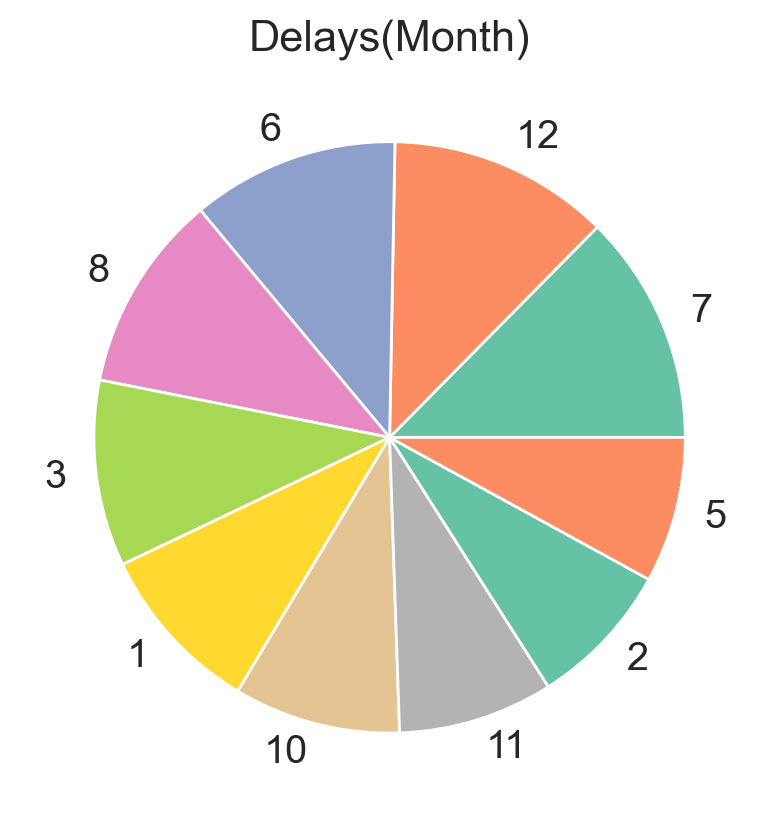

In [1077]:
plt.pie(data=F.head(10), x='Delayed', labels='Month')
plt.title("Delays(Month)")
plt.show()